### CNN

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [10]:
alpha = 0.01
num = 10
batch_len = 5
correct_number = 0
total_number = 0
correctArr = [0 for i in range(10)]
totalArr = [0 for i in range(10)]

In [11]:
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(),  download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [41]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_len,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_len,shuffle=False)

In [42]:
dataiter = iter(train_loader)
img, labels = next(dataiter)
img.shape

torch.Size([5, 3, 32, 32])

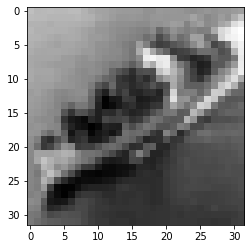

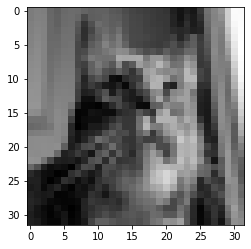

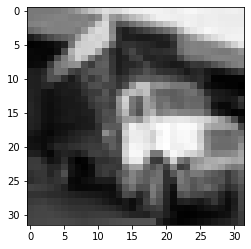

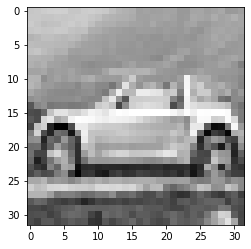

In [43]:
for i in range(4):
    plt.imshow(img[i][2],cmap='gray')
    plt.show()

In [44]:
class ConvNet(nn.Module):
    def __init__(self):

        super(ConvNet, self).__init__()
        self.cnv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.cnv2 = nn.Conv2d(6, 16, 5)
        self.f1 = nn.Linear(400, 120)
        self.f2 = nn.Linear(120, 84)
        self.f3 = nn.Linear(84,40)
        self.f4 = nn.Linear(40, 10)

    def forward(self, x):  

        out = self.cnv1(x)
        out = torch.relu(out)
        out = self.pool(out)
        out = self.cnv2(out)
        out = torch.relu(out)
        out = self.pool(out)
        out = out.reshape(-1,400)              
        out = self.f1(out)
        out = torch.relu(out)             
        out = self.f2(out)
        out = torch.relu(out)               
        out = self.f3(out) 
        out = torch.relu(out)
        out = self.f4(out)
        out = torch.relu(out)                      
        return out

model = ConvNet()

In [45]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters() , lr=alpha)

In [46]:
cnt = 0
for epoch in range(num):
    for index , (img , labl) in enumerate(train_loader):
        
        prd = model(img)
        ls = loss(prd , labl)
        ls.backward()

        optim.step()
        optim.zero_grad()

        cnt = cnt + 1
        
        if (index % 4200 == 0):
            print(cnt ,'. ' , "Loss = " , ls.item())

1 .  Loss =  2.3112399578094482
4201 .  Loss =  2.3035569190979004
8401 .  Loss =  2.303847074508667
10001 .  Loss =  2.366856098175049
14201 .  Loss =  1.5040311813354492
18401 .  Loss =  1.8237394094467163
20001 .  Loss =  2.007838010787964
24201 .  Loss =  1.9065892696380615
28401 .  Loss =  1.064904808998108
30001 .  Loss =  1.9376823902130127
34201 .  Loss =  1.1918925046920776
38401 .  Loss =  1.0978797674179077
40001 .  Loss =  1.6147130727767944
44201 .  Loss =  1.1641393899917603
48401 .  Loss =  1.0689061880111694
50001 .  Loss =  0.9287583231925964
54201 .  Loss =  1.6663129329681396
58401 .  Loss =  1.3576964139938354
60001 .  Loss =  0.37446391582489014
64201 .  Loss =  0.8671455383300781
68401 .  Loss =  1.1820080280303955
70001 .  Loss =  1.109352469444275
74201 .  Loss =  0.9369174242019653
78401 .  Loss =  1.532926321029663
80001 .  Loss =  0.6949936747550964
84201 .  Loss =  0.5667980909347534
88401 .  Loss =  1.0177619457244873
90001 .  Loss =  1.1898982524871826
942

### Saving the model

In [ ]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

### Loading the model

In [ ]:
mlp = ConvNet()
mlp.load_state_dict(torch.load('./cnn.pth'))
mlp.eval()

ConvNet(
  (cnv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (f1): Linear(in_features=400, out_features=120, bias=True)
  (f2): Linear(in_features=120, out_features=84, bias=True)
  (f3): Linear(in_features=84, out_features=40, bias=True)
  (f4): Linear(in_features=40, out_features=10, bias=True)
)

In [ ]:
with torch.no_grad():
    for img, labels in test_loader:
        pred = model(img)

        _, predict = torch.max(pred, 1)
        total_number += labels.size(0)
        correct_number += (predict == labels).sum().item()
        
        for i in range(batch_len):
            if (labels[i] == predict[i]):
                correctArr[labels[i]] += 1
            totalArr[labels[i]] += 1

    accuracy = (100.0 * (correct_number / total_number))
    print("Accuracy of the neural network is = " , accuracy,"%")

    for i in range(10):
        accuracy = 100.0 * correctArr[i] / totalArr[i]
        print("Accuracy of ",classes[i]," is : ", accuracy, "%")

Accuracy of the neural network is =  60.35 %
Accuracy of  plane  is :  59.8 %
Accuracy of  car  is :  79.4 %
Accuracy of  bird  is :  42.2 %
Accuracy of  cat  is :  40.5 %
Accuracy of  deer  is :  63.9 %
Accuracy of  dog  is :  46.9 %
Accuracy of  frog  is :  66.3 %
Accuracy of  horse  is :  61.5 %
Accuracy of  ship  is :  79.6 %
Accuracy of  truck  is :  63.4 %
